In [2]:
import pandas as pd
import networkx as nx
import openpyxl
import distance
import matplotlib.pyplot as plt
import gseapy as gp
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import gseapy as gp
import numpy as np  
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler



In [3]:
import warnings

### Before run the next cell, make sure to have runned the file "databases-1.ipynb, and also the file "PE_roject_elisa".

In [4]:


# kegg
kegg = pd.read_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/KEGG_2021_Human_Disease_Disease_Intersections.xlsx")

# reactome
reactome = pd.read_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/Reactome_2022_Disease_Disease_Intersections.xlsx")

# go biological process
go_bp = pd.read_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/GO_Biological_Process_2021_Disease_Disease_Intersections.xlsx")

# go molecular function
go_mf = pd.read_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/GO_Molecular_Function_2021_Disease_Disease_Intersections.xlsx")

# go cellular component
go_cc = pd.read_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/GO_Cellular_Component_Disease_Disease_Intersections.xlsx")



# K-Means K = 2


In [5]:
# take just the column of the intersection over min
kegg_min = kegg[['Intersection over min % OD ∩ RD']].rename(columns={"Intersection over min % OD ∩ RD": "KEGG"})
reactome_min = reactome[['Intersection over min % OD ∩ RD']].rename(columns={"Intersection over min % OD ∩ RD": "Reactome"})
go_bp_min = go_bp[['Intersection over min % OD ∩ RD']].rename(columns={"Intersection over min % OD ∩ RD": "GO Biological Process"})
go_mf_min= go_mf[['Intersection over min % OD ∩ RD']].rename(columns={"Intersection over min % OD ∩ RD": "GO Molecular Function"})
go_cc_min = go_cc[['Intersection over min % OD ∩ RD']].rename(columns={"Intersection over min % OD ∩ RD": "GO Cellular Component"})


#upload Disease Disease file
disease_disease = pd.read_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Disease_Disease_summary.xlsx")

# Concatena tutti i DataFrame
df = pd.concat([kegg_min, reactome_min, go_bp_min, go_mf_min, go_cc_min], axis=1)

df.index = disease_disease['Disease - Disease']

#rename the index column 
df.index.name = 'Diseases'


In [6]:
df

,KEGG,Reactome,GO Biological Process,GO Molecular Function,GO Cellular Component
Diseases,,,,,
Colorectal carcinoma - Human Immunodeficiency Virus,89.552239,51.127820,53.433476,22.222222,71.428571
Colorectal carcinoma - Acquired Immunodeficiency Syndrome,67.910448,24.060150,37.768240,11.111111,28.571429
Idiopathic intracranial hypertension - Alopecia,0.000000,0.000000,0.000000,0.000000,0.000000
Angina pectoris - Erectile dysfunction,55.555556,40.000000,45.316456,38.235294,0.000000
Nausea and vomiting - Erythema nodosum leprosum,81.609195,26.250000,37.668161,20.000000,50.000000
Nausea and vomiting - Multiple myeloma,73.770492,30.000000,35.625000,30.000000,40.000000
Generalized Osteoarthritis - Multiple adenomatous polyps,62.727273,27.619048,39.171975,6.250000,42.857143
Rheumatoid arthritis - Multiple adenomatous polyps,44.791667,16.279070,32.165605,25.000000,0.000000
Parkinson disease - Attention deficit hyperactivity disorder,33.333333,10.000000,31.847134,10.714286,35.000000


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
data_numeric = df[['KEGG', 'Reactome', 'GO Biological Process', 'GO Molecular Function', 'GO Cellular Component']].values


/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


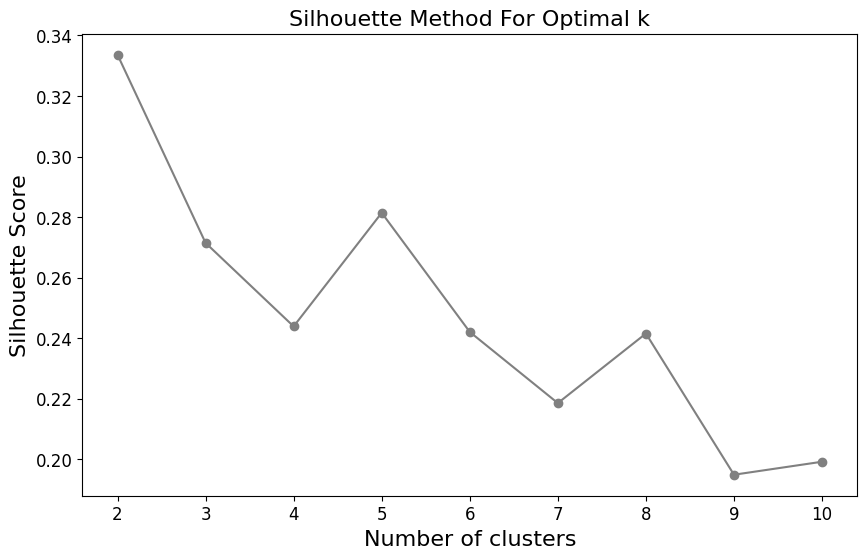

In [9]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Supponendo che tu abbia già definito data_numeric

silhouette_scores = []
K = range(2, 11) 

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_numeric)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(data_numeric, labels))

# Traccia il metodo della silhouette
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o', color ="gray")
plt.title('Silhouette Method For Optimal k', fontsize=16)  # Aumenta la dimensione del titolo
plt.xlabel('Number of clusters', fontsize=16)  # Aumenta la dimensione dell'etichetta x
plt.ylabel('Silhouette Score', fontsize=16)  # Aumenta la dimensione dell'etichetta y

# Aumenta la dimensione del testo dei numeri sugli assi
plt.xticks(fontsize=12)  # Dimensione del testo per l'asse x
plt.yticks(fontsize=12)  # Dimensione del testo per l'asse y

plt.show()


In [10]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [11]:
# optimal number of clusters
optimal_k = 2

# Esegui il clustering con KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(data_numeric)

# Percorso di base per salvare i risultati
base_path = "/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/INTERSECTION_OVER_MIN/"

# Nome della cartella basato sul numero di cluster
cluster_folder = f"K_MEANS_K_{optimal_k}"

# Percorso completo della cartella
full_path = os.path.join(base_path, cluster_folder)

# Crea la cartella se non esiste
os.makedirs(full_path, exist_ok=True)

# Percorso del file Excel
output_file_path_clusters = os.path.join(full_path, f"df_KMEANS_K_{optimal_k}.xlsx")

# Salva il DataFrame come file Excel nella nuova cartella
df.to_excel(output_file_path_clusters, index=True)

# Visualizza il DataFrame
df

/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,KEGG,Reactome,GO Biological Process,GO Molecular Function,GO Cellular Component,Cluster
Diseases,,,,,,
Colorectal carcinoma - Human Immunodeficiency Virus,89.552239,51.127820,53.433476,22.222222,71.428571,0
Colorectal carcinoma - Acquired Immunodeficiency Syndrome,67.910448,24.060150,37.768240,11.111111,28.571429,1
Idiopathic intracranial hypertension - Alopecia,0.000000,0.000000,0.000000,0.000000,0.000000,1
Angina pectoris - Erectile dysfunction,55.555556,40.000000,45.316456,38.235294,0.000000,1
Nausea and vomiting - Erythema nodosum leprosum,81.609195,26.250000,37.668161,20.000000,50.000000,0
Nausea and vomiting - Multiple myeloma,73.770492,30.000000,35.625000,30.000000,40.000000,0
Generalized Osteoarthritis - Multiple adenomatous polyps,62.727273,27.619048,39.171975,6.250000,42.857143,1
Rheumatoid arthritis - Multiple adenomatous polyps,44.791667,16.279070,32.165605,25.000000,0.000000,1
Parkinson disease - Attention deficit hyperactivity disorder,33.333333,10.000000,31.847134,10.714286,35.000000,1


In [12]:
# Definizione della funzione per creare i dati clusterizzati per ciascun database
def create_clustered_data(df, db_name):
    clustered_data = []
    
    for cluster_id in range(optimal_k):
        cluster = df[df['Cluster'] == cluster_id]
        cluster_dict = {
            'Cluster': cluster_id,
            'Diseases': cluster.index.tolist(),
            db_name: cluster[db_name].tolist()
        }
        clustered_data.append(cluster_dict)
    
    clustered_df = pd.DataFrame(clustered_data)
    return clustered_df

##################################################### Numero ottimale di cluster ATTENZIONE ########################################################
optimal_k = 2

# Esegui il clustering con KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(data_numeric)

# Percorso di base per salvare i risultati
base_path = "/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/INTERSECTION_OVER_MIN/"
cluster_folder = f"K_MEANS_K_{optimal_k}"
full_path = os.path.join(base_path, cluster_folder)

# Crea la cartella se non esiste
os.makedirs(full_path, exist_ok=True)

# Genera i dati clusterizzati per ogni database
clustered_data_kegg = create_clustered_data(df, 'KEGG')
clustered_data_reactome = create_clustered_data(df, 'Reactome')
clustered_data_gobp = create_clustered_data(df, 'GO Biological Process')
clustered_data_gomf = create_clustered_data(df, 'GO Molecular Function')
clustered_data_gocc = create_clustered_data(df, 'GO Cellular Component')


# Salva i risultati in file Excel nella cartella appropriata
clustered_data_kegg.to_excel(os.path.join(full_path, "Clustering_Results_KEGG.xlsx"), index=False)
clustered_data_reactome.to_excel(os.path.join(full_path, "Clustering_Results_Reactome.xlsx"), index=False)
clustered_data_gobp.to_excel(os.path.join(full_path, "Clustering_Results_GOBP.xlsx"), index=False)
clustered_data_gomf.to_excel(os.path.join(full_path, "Clustering_Results_GOMF.xlsx"), index=False)
clustered_data_gocc.to_excel(os.path.join(full_path, "Clustering_Results_GOCC.xlsx"), index=False)


# Visualizza i risultati (opzionale, solo per verifica)
print("Risultati del clustering salvati con successo.")

Risultati del clustering salvati con successo.


/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


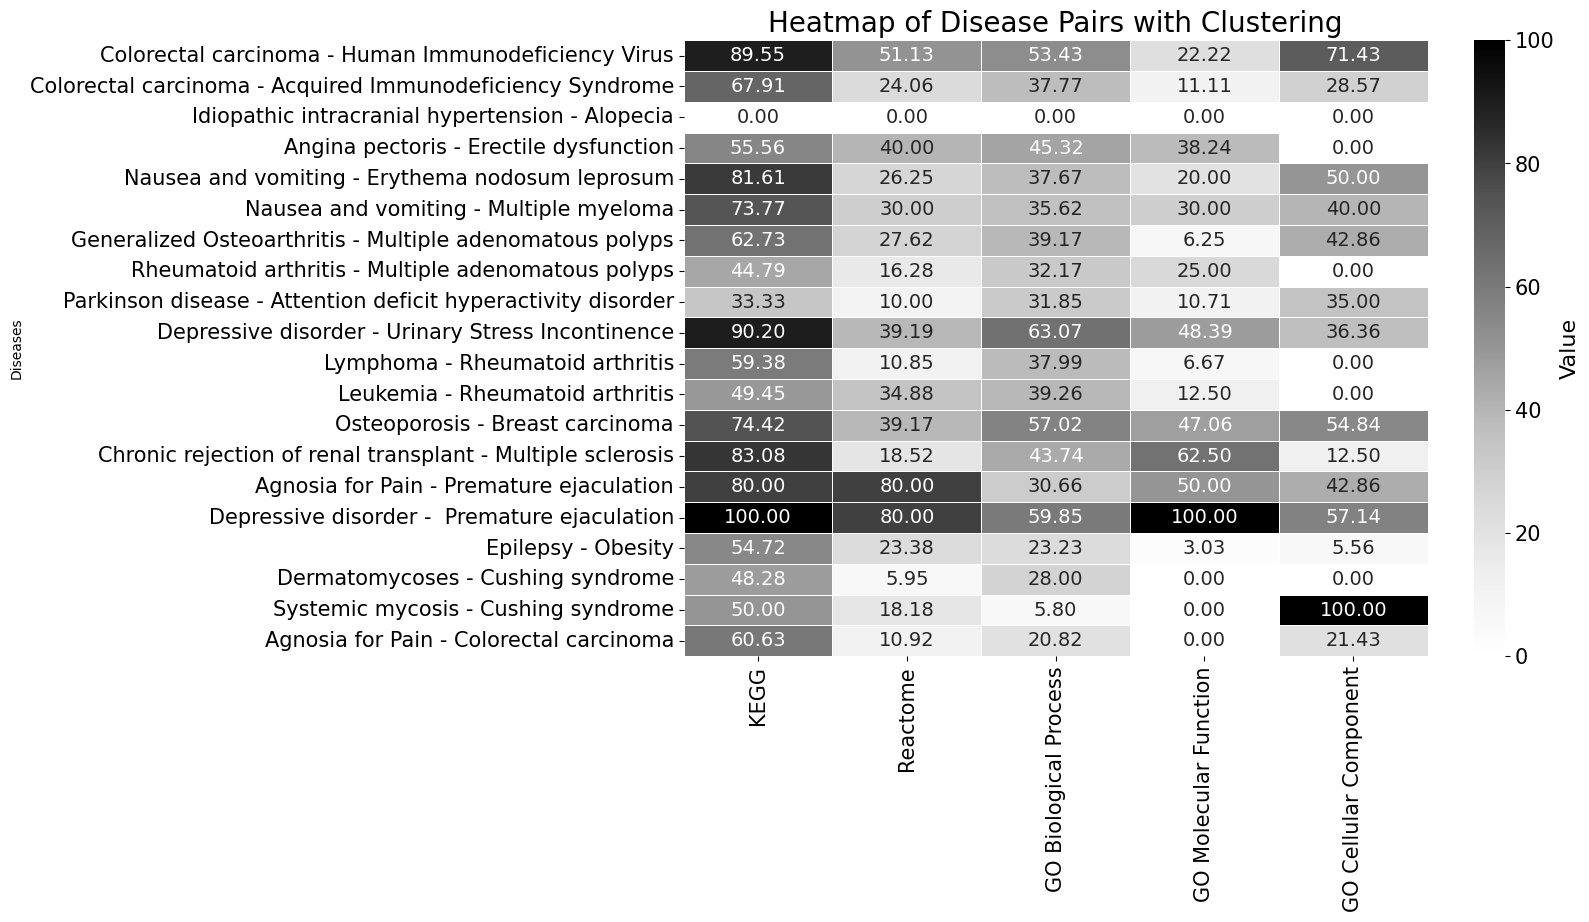

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definisci le dimensioni della figura
plt.figure(figsize=(12, 8))

# Crea la heatmap con i valori delle colonne normalizzate e aumenta la dimensione del testo
heatmap = sns.heatmap(
    df[['KEGG', 'Reactome', 'GO Biological Process', 'GO Molecular Function', 'GO Cellular Component']],
    cmap='Greys',
    annot=True,
    fmt=".2f",
    linewidths=.5,
    annot_kws={"size": 14}  # Modifica la dimensione del testo annotato qui
)

# Aggiungi un titolo
plt.title('Heatmap of Disease Pairs with Clustering', fontsize=20)

# Aumenta la dimensione del testo degli assi
plt.xticks(fontsize=15)  # Dimensione del testo per l'asse x
plt.yticks(fontsize=15)  # Dimensione del testo per l'asse y

# Aumenta la dimensione del font della colorbar
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=15)  # Aumenta la dimensione del font della colorbar
colorbar.set_label('Value', fontsize=16)  # Aggiungi una label alla colorbar con dimensione del font

# Mostra la heatmap
plt.show()


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import os

# Supponiamo che 'df' sia il tuo DataFrame con i dati e la colonna 'Cluster'
data_numeric = df.drop(columns=['Cluster'])  # Escludi la colonna Cluster
#scaler = StandardScaler()
#data_scaled = scaler.fit_transform(data_numeric)

# Esegui PCA per ridurre a 2 dimensioni
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_numeric)

# Crea un DataFrame con i risultati di PCA
df_pca = pd.DataFrame(data_pca, columns=['Dimension1', 'Dimension2'], index=df.index)
df_pca['Cluster'] = df['Cluster']


df_pca


,Dimension1,Dimension2,Cluster
Diseases,,,
Colorectal carcinoma - Human Immunodeficiency Virus,43.890235,29.913305,0
Colorectal carcinoma - Acquired Immunodeficiency Syndrome,-7.356726,4.306888,1
Idiopathic intracranial hypertension - Alopecia,-80.783152,-1.699618,1
Angina pectoris - Erectile dysfunction,-1.085433,-34.529662,1
Nausea and vomiting - Erythema nodosum leprosum,14.010721,18.491248,0
Nausea and vomiting - Multiple myeloma,12.537102,6.125350,0
Generalized Osteoarthritis - Multiple adenomatous polyps,-4.667785,18.384113,1
Rheumatoid arthritis - Multiple adenomatous polyps,-28.242850,-23.265699,1
Parkinson disease - Attention deficit hyperactivity disorder,-30.267849,14.402071,1


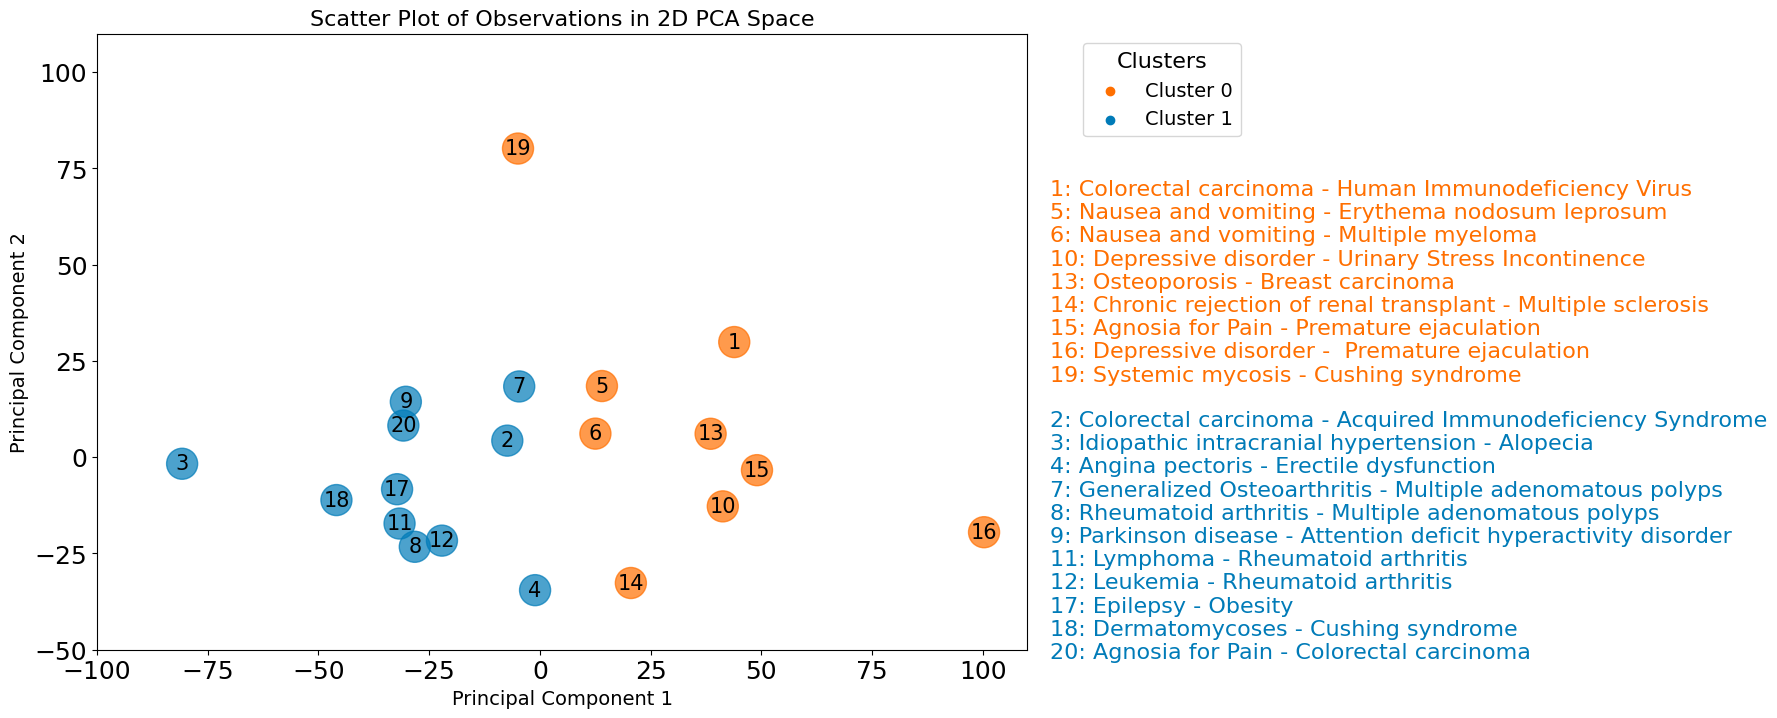

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Estrai i risultati PCA come numpy array
pca_results = df_pca[['Dimension1', 'Dimension2']].values

# Crea una lista di colori per i cluster (arancione intenso e blu più scuro)
colors = ['#FF6F00' if cluster == 0 else '#007BB8' for cluster in df_pca['Cluster']]  # Colori modificati

# Crea un grafico di dispersione per visualizzare le osservazioni nello spazio PCA 2D
plt.figure(figsize=(12, 8))  # Aumenta la dimensione della figura
plt.scatter(pca_results[:, 0],  # posizione sulla prima componente principale
            pca_results[:, 1],  # posizione sulla seconda componente principale
            c=colors,           # usa i colori definiti per i cluster
            alpha=0.7,         # trasparenza dei punti
            s=500)             # dimensione dei punti

# Aggiungi titolo e etichette degli assi
plt.title('Scatter Plot of Observations in 2D PCA Space', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

# Imposta i limiti per l'asse x e y
plt.xlim(-100, 110)  # Limiti dell'asse x
plt.ylim(-50, 110)   # Limiti dell'asse y

# Aggiungi ticks personalizzati per l'asse x
x_ticks = np.arange(-100, 120, 25)  # Intervallo di 25
plt.xticks(x_ticks, fontsize=18)

# Aggiungi ticks personalizzati per l'asse y
y_ticks = np.arange(-50, 120, 25)  
plt.yticks(y_ticks, fontsize=18)

# Aggiungi numeri ai punti (sopra i punti, direttamente sui pallini)
for i in range(len(df_pca)):
    plt.annotate(i + 1,  # Usa un numero per ogni punto
                 (pca_results[i, 0], pca_results[i, 1]), 
                 fontsize=15, 
                 xytext=(0, 0),  # Offset per posizionare il numero sopra il punto
                 textcoords='offset points', 
                 ha='center', 
                 va='center')  # Allinea il testo al centro del punto

# Crea una leggenda per i cluster
cluster_legend = {}
for i, cluster in enumerate(df_pca['Cluster']):
    disease = df_pca.index[i]
    if cluster not in cluster_legend:
        cluster_legend[cluster] = []
    cluster_legend[cluster].append((i + 1, disease))  # Aggiungi il numero e la malattia

# Posizione della leggenda
legend_y_offset = 0.0
max_x_value = np.max(pca_results[:, 0])  # Valore massimo dell'asse x
for cluster, diseases in cluster_legend.items():
    # Aggiungi il puntino colorato alla leggenda
    color = '#FF6F00' if cluster == 0 else '#007BB8'  # Colori della leggenda
    plt.scatter([], [], c=color, label=f"Cluster {cluster}")  # Aggiungi il colore alla leggenda
    # Unisci le malattie con newline per renderle in colonna
    disease_list = '\n'.join([f"{num}: {disease}" for num, disease in diseases])  
    plt.text(max_x_value + 15, np.max(pca_results[:, 1]) -8 - legend_y_offset, 
             f"{disease_list}", fontsize=16, color=color, va='top', ha='left')  # Aumenta la dimensione del font
    legend_y_offset += 60  # Incrementa l'offset per il prossimo cluster

# Aggiungi una griglia sullo sfondo
plt.grid(False)

# Aggiungi la leggenda per i cluster
plt.legend(title="Clusters", title_fontsize='16', fontsize='14', bbox_to_anchor=(1.05, 1), loc='upper left')  # Aumenta la dimensione del font della leggenda
plt.show()


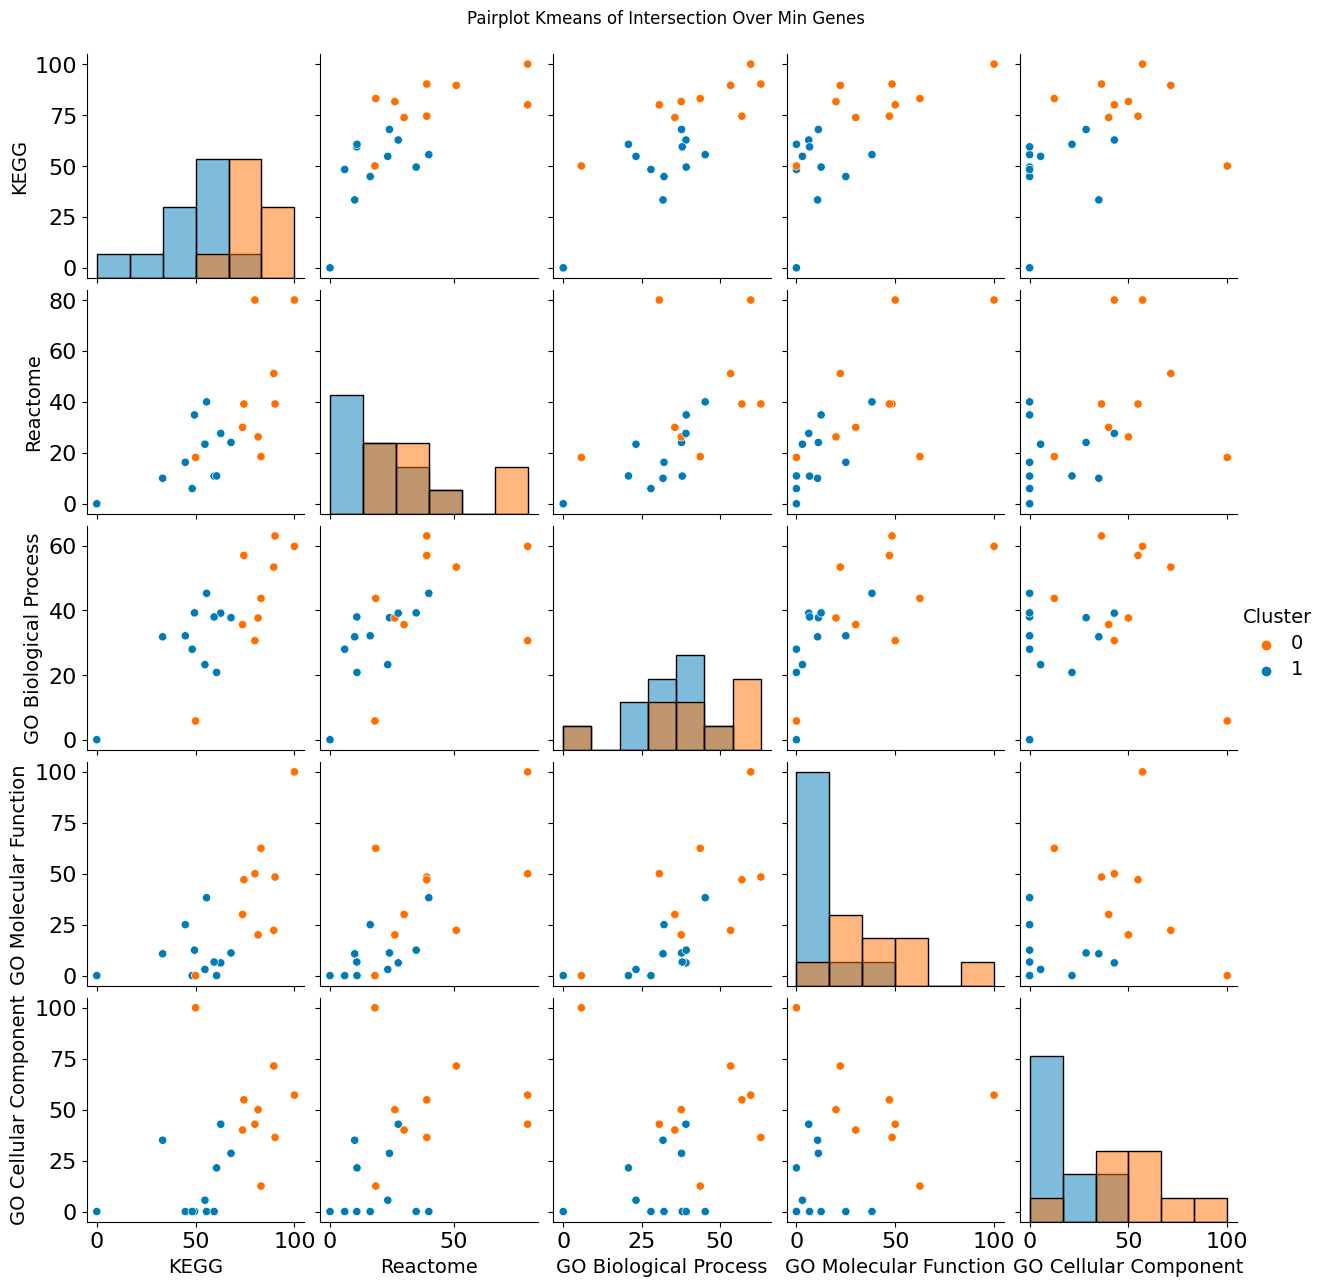

In [16]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Percorso di base per salvare i risultati
base_path = "/Users/elisa/Desktop/Tesi/PROGETTO/Risultati_clustering/INTERSECTION_OVER_MIN/"
cluster_folder = f"K_MEANS_K_{optimal_k}"
full_path = os.path.join(base_path, cluster_folder)

# Crea la cartella se non esiste
os.makedirs(full_path, exist_ok=True)

# Definisci la palette per i cluster (usando gli stessi colori del grafico di dispersione)
custom_palette = {0: '#FF6F00', 1: '#007BB8'}

# Pairplot of intersection over min ratios
pairplot = sns.pairplot(df, vars=['KEGG', 'Reactome', 'GO Biological Process', 'GO Molecular Function', 'GO Cellular Component'], 
             hue='Cluster', palette=custom_palette, diag_kind='hist')

# Aggiungi titolo e modifica la dimensione del font
pairplot.fig.suptitle('Pairplot Kmeans of Intersection Over Min Genes', y=1.02, fontsize=12)

# Modifica le dimensioni dei font degli assi
for ax in pairplot.axes.flatten():
    ax.title.set_fontsize(14)  # Dimensione del font del titolo di ogni subplot
    ax.xaxis.label.set_size(14)  # Dimensione del font dell'etichetta x
    ax.yaxis.label.set_size(14)  # Dimensione del font dell'etichetta y
    ax.tick_params(axis='both', labelsize=16)  # Dimensione del font dei tick

# Modifica la dimensione del testo della leggenda
pairplot._legend.set_title('Cluster')  # Imposta il titolo della leggenda
pairplot._legend.get_title().set_fontsize(14)  # Dimensione del font del titolo della leggenda
for text in pairplot._legend.texts:
    text.set_fontsize(14)  # Dimensione del font degli elementi della leggenda

# Salva il pairplot
output_file_path_pairplot = os.path.join(full_path, "Pairplot.png")
plt.savefig(output_file_path_pairplot, dpi=300, bbox_inches='tight')

# Mostra il pairplot
plt.show()



## Comaparation between the separation measure and the previous table


## The first part of the Topological analysis, can be found in the file "PE_project_elisa.ipynb"

In [17]:
# take just the column of the intersection over min
kegg_min = kegg[['Intersection over min % OD ∩ RD']].rename(columns={"Intersection over min % OD ∩ RD": "KEGG"})
reactome_min = reactome[['Intersection over min % OD ∩ RD']].rename(columns={"Intersection over min % OD ∩ RD": "Reactome"})
go_bp_min = go_bp[['Intersection over min % OD ∩ RD']].rename(columns={"Intersection over min % OD ∩ RD": "GO Biological Process"})
go_mf_min= go_mf[['Intersection over min % OD ∩ RD']].rename(columns={"Intersection over min % OD ∩ RD": "GO Molecular Function"})
go_cc_min = go_cc[['Intersection over min % OD ∩ RD']].rename(columns={"Intersection over min % OD ∩ RD": "GO Cellular Component"})


#upload Disease Disease file
disease_disease = pd.read_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Disease_Disease_summary.xlsx")

# Concatena tutti i DataFrame
df = pd.concat([kegg_min, reactome_min, go_bp_min, go_mf_min, go_cc_min], axis=1)

df.index = disease_disease['Disease - Disease']

#rename the index column 
df.index.name = 'Diseases'

df

,KEGG,Reactome,GO Biological Process,GO Molecular Function,GO Cellular Component
Diseases,,,,,
Colorectal carcinoma - Human Immunodeficiency Virus,89.552239,51.127820,53.433476,22.222222,71.428571
Colorectal carcinoma - Acquired Immunodeficiency Syndrome,67.910448,24.060150,37.768240,11.111111,28.571429
Idiopathic intracranial hypertension - Alopecia,0.000000,0.000000,0.000000,0.000000,0.000000
Angina pectoris - Erectile dysfunction,55.555556,40.000000,45.316456,38.235294,0.000000
Nausea and vomiting - Erythema nodosum leprosum,81.609195,26.250000,37.668161,20.000000,50.000000
Nausea and vomiting - Multiple myeloma,73.770492,30.000000,35.625000,30.000000,40.000000
Generalized Osteoarthritis - Multiple adenomatous polyps,62.727273,27.619048,39.171975,6.250000,42.857143
Rheumatoid arthritis - Multiple adenomatous polyps,44.791667,16.279070,32.165605,25.000000,0.000000
Parkinson disease - Attention deficit hyperactivity disorder,33.333333,10.000000,31.847134,10.714286,35.000000


In [18]:
df_reset = df.reset_index()

In [19]:
separation_data_path = "/Users/elisa/Desktop/Tesi/Progetto/Disease_Modules_Separation.xlsx"
df_separation = pd.read_excel(separation_data_path)

In [20]:
df_separation['Disease 2'] = df_separation['Disease 2'].replace('Pseudotumor Cerebri', 'Idiopathic intracranial hypertension')

df_separation = pd.DataFrame({
    'Disease 1': ["Colorectal carcinoma",
    "Colorectal carcinoma",
    "Idiopathic intracranial hypertension",
    "Angina pectoris",
    "Nausea and vomiting",
    "Nausea and vomiting",
    "Generalized Osteoarthritis",
    "Rheumatoid arthritis",
    "Parkinson disease",
    "Depressive disorder",
    "Lymphoma",
    "Leukemia",
    "Osteoporosis",
    "Chronic rejection of renal transplant",
    "Agnosia for Pain",
    "Depressive disorder",
    "Epilepsy",
    "Dermatomycoses",
    "Systemic mycosis",
    "Agnosia for Pain"],

    
    'Disease 2': ["Human Immunodeficiency Virus",
    "Acquired Immunodeficiency Syndrome",
    "Alopecia",
    "Erectile dysfunction",
    "Erythema nodosum leprosum",
    "Multiple myeloma",
    "Multiple adenomatous polyps",
    "Multiple adenomatous polyps",
    "Attention deficit hyperactivity disorder",
    "Urinary Stress Incontinence",
    "Rheumatoid arthritis",
    "Rheumatoid arthritis",
    "Breast carcinoma",
    "Multiple sclerosis",
    "Premature ejaculation",
    "Premature ejaculation",
    "Obesity",
    "Cushing syndrome",
    "Cushing syndrome",
    "Colorectal carcinoma"],
    's_AB in PPI': [0.006424, 0.012043, 0.029552, 0.050203, 0.049956, 0.006509, 0.025462, 0.026393, 0.018845, 0.030946, 0.004272, 
                    0.017594, 0.006915, 0.044379, -0.014970, -0.000687, 0.008055, -0.024242, 0.058815, 0.019250],
    's_AB in FI': [0.021787, 0.038213, -0.098765, 0.095766, 0.076307, 0.039211, 0.040536, 0.064075, 0.190720, 0.084072, 
                   0.026559, 0.102770, 0.033762, 0.010431, -0.029855, -0.015515, 0.052870, 0.030989, -0.102639, 0.101731]
})
df_separation = pd.DataFrame(df_separation)


In [21]:
df_separation['Diseases'] = df_separation['Disease 1'] + ' - ' + df_separation['Disease 2']
df_separation = df_separation[['Diseases'] + [col for col in df_separation.columns if col not in ['Diseases', 'Disease 1', 'Disease 2']]]
# save it to excel
df_separation.to_excel("/Users/elisa/Desktop/Tesi/PROGETTO/Disease_Modules_Separation_corrected.xlsx", index=False)
df_separation

,Diseases,s_AB in PPI,s_AB in FI
0,Colorectal carcinoma - Human Immunodeficiency ...,0.006424,0.021787
1,Colorectal carcinoma - Acquired Immunodeficien...,0.012043,0.038213
2,Idiopathic intracranial hypertension - Alopecia,0.029552,-0.098765
3,Angina pectoris - Erectile dysfunction,0.050203,0.095766
4,Nausea and vomiting - Erythema nodosum leprosum,0.049956,0.076307
5,Nausea and vomiting - Multiple myeloma,0.006509,0.039211
6,Generalized Osteoarthritis - Multiple adenomat...,0.025462,0.040536
7,Rheumatoid arthritis - Multiple adenomatous po...,0.026393,0.064075
8,Parkinson disease - Attention deficit hyperact...,0.018845,0.190720
9,Depressive disorder - Urinary Stress Incontinence,0.030946,0.084072


In [22]:
df_reset['Diseases'] = df_reset['Diseases'].str.strip().str.lower()
df_separation['Diseases'] = df_separation['Diseases'].str.strip().str.lower()
df_reset['Diseases'] = df_reset['Diseases'].str.strip().str.replace('  ', ' ')
df_separation['Diseases'] = df_separation['Diseases'].str.strip()

In [23]:
merged_df = pd.merge(df_reset, df_separation[['Diseases', 's_AB in PPI', 's_AB in FI']], on='Diseases', how='left')

merged_df

,Diseases,KEGG,Reactome,GO Biological Process,GO Molecular Function,GO Cellular Component,s_AB in PPI,s_AB in FI
0,colorectal carcinoma - human immunodeficiency ...,89.552239,51.127820,53.433476,22.222222,71.428571,0.006424,0.021787
1,colorectal carcinoma - acquired immunodeficien...,67.910448,24.060150,37.768240,11.111111,28.571429,0.012043,0.038213
2,idiopathic intracranial hypertension - alopecia,0.000000,0.000000,0.000000,0.000000,0.000000,0.029552,-0.098765
3,angina pectoris - erectile dysfunction,55.555556,40.000000,45.316456,38.235294,0.000000,0.050203,0.095766
4,nausea and vomiting - erythema nodosum leprosum,81.609195,26.250000,37.668161,20.000000,50.000000,0.049956,0.076307
5,nausea and vomiting - multiple myeloma,73.770492,30.000000,35.625000,30.000000,40.000000,0.006509,0.039211
6,generalized osteoarthritis - multiple adenomat...,62.727273,27.619048,39.171975,6.250000,42.857143,0.025462,0.040536
7,rheumatoid arthritis - multiple adenomatous po...,44.791667,16.279070,32.165605,25.000000,0.000000,0.026393,0.064075
8,parkinson disease - attention deficit hyperact...,33.333333,10.000000,31.847134,10.714286,35.000000,0.018845,0.190720
9,depressive disorder - urinary stress incontinence,90.196078,39.189189,63.072776,48.387097,36.363636,0.030946,0.084072


In [24]:
merged_df.set_index('Diseases', inplace=True)

In [25]:
# normalize merged_df
from sklearn.preprocessing import MinMaxScaler

# Creiamo un oggetto scaler per la normalizzazione min-max
scaler = MinMaxScaler()

# Selezioniamo tutte le colonne tranne 'Diseases' per la normalizzazione
columns_to_normalize = merged_df.columns.difference(['Diseases'])

# Applichiamo lo scaler solo alle colonne selezionate
merged_df[columns_to_normalize] = scaler.fit_transform(merged_df[columns_to_normalize])



merged_df = pd.DataFrame(merged_df)



In [26]:
merged_df

,KEGG,Reactome,GO Biological Process,GO Molecular Function,GO Cellular Component,s_AB in PPI,s_AB in FI
Diseases,,,,,,,
colorectal carcinoma - human immunodeficiency virus,0.895522,0.639098,0.847172,0.222222,0.714286,0.369216,0.424142
colorectal carcinoma - acquired immunodeficiency syndrome,0.679104,0.300752,0.598804,0.111111,0.285714,0.436869,0.480135
idiopathic intracranial hypertension - alopecia,0.000000,0.000000,0.000000,0.000000,0.000000,0.647676,0.013206
angina pectoris - erectile dysfunction,0.555556,0.500000,0.718479,0.382353,0.000000,0.896312,0.676322
nausea and vomiting - erythema nodosum leprosum,0.816092,0.328125,0.597217,0.200000,0.500000,0.893338,0.609990
nausea and vomiting - multiple myeloma,0.737705,0.375000,0.564824,0.300000,0.400000,0.370240,0.483537
generalized osteoarthritis - multiple adenomatous polyps,0.627273,0.345238,0.621060,0.062500,0.428571,0.598432,0.488054
rheumatoid arthritis - multiple adenomatous polyps,0.447917,0.203488,0.509976,0.250000,0.000000,0.609642,0.568293
parkinson disease - attention deficit hyperactivity disorder,0.333333,0.125000,0.504927,0.107143,0.350000,0.518764,1.000000


In [27]:
merged_df.to_excel("/Users/elisa/Desktop/Tesi/PROGETTO/matrix_separation.xlsx", index=False)


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [29]:
data_numeric = merged_df[["KEGG",	"Reactome",	"GO Biological Process"	,"GO Molecular Function",	"GO Cellular Component",	"s_AB in PPI", "s_AB in FI"]].values

/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


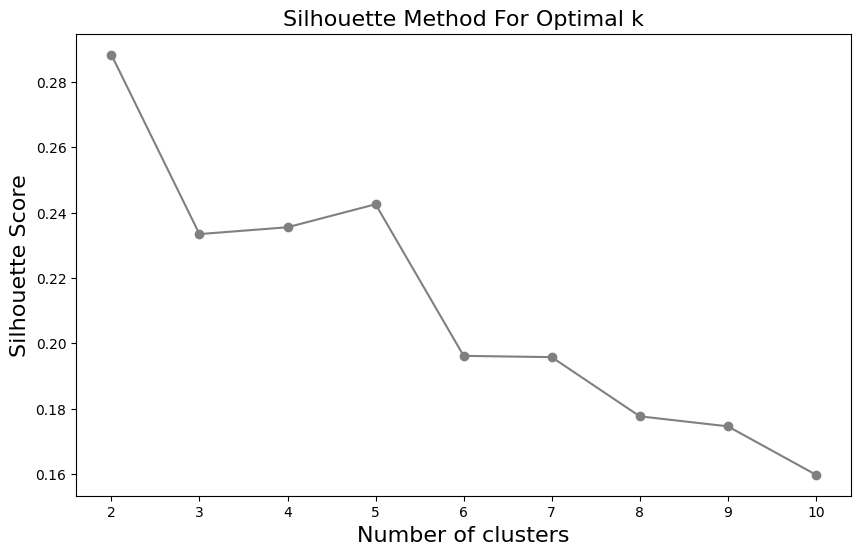

In [30]:
silhouette_scores = []
K = range(2, 11) 

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_numeric)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(data_numeric, labels))

# Traccia il metodo della silhouette
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o', color ="gray")

# Aumenta la dimensione del font a 16
plt.title('Silhouette Method For Optimal k', fontsize=16)
plt.xlabel('Number of clusters', fontsize=16)
plt.ylabel('Silhouette Score', fontsize=16)

# Mostra il grafico
plt.show()


In [31]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [32]:
# Numero ottimale di cluster
optimal_k = 2

# Esegui il clustering con KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
merged_df['Cluster'] = kmeans.fit_predict(merged_df[columns_to_normalize])

merged_df

/Users/elisa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,KEGG,Reactome,GO Biological Process,GO Molecular Function,GO Cellular Component,s_AB in PPI,s_AB in FI,Cluster
Diseases,,,,,,,,
colorectal carcinoma - human immunodeficiency virus,0.895522,0.639098,0.847172,0.222222,0.714286,0.369216,0.424142,1
colorectal carcinoma - acquired immunodeficiency syndrome,0.679104,0.300752,0.598804,0.111111,0.285714,0.436869,0.480135,0
idiopathic intracranial hypertension - alopecia,0.000000,0.000000,0.000000,0.000000,0.000000,0.647676,0.013206,0
angina pectoris - erectile dysfunction,0.555556,0.500000,0.718479,0.382353,0.000000,0.896312,0.676322,0
nausea and vomiting - erythema nodosum leprosum,0.816092,0.328125,0.597217,0.200000,0.500000,0.893338,0.609990,0
nausea and vomiting - multiple myeloma,0.737705,0.375000,0.564824,0.300000,0.400000,0.370240,0.483537,0
generalized osteoarthritis - multiple adenomatous polyps,0.627273,0.345238,0.621060,0.062500,0.428571,0.598432,0.488054,0
rheumatoid arthritis - multiple adenomatous polyps,0.447917,0.203488,0.509976,0.250000,0.000000,0.609642,0.568293,0
parkinson disease - attention deficit hyperactivity disorder,0.333333,0.125000,0.504927,0.107143,0.350000,0.518764,1.000000,0


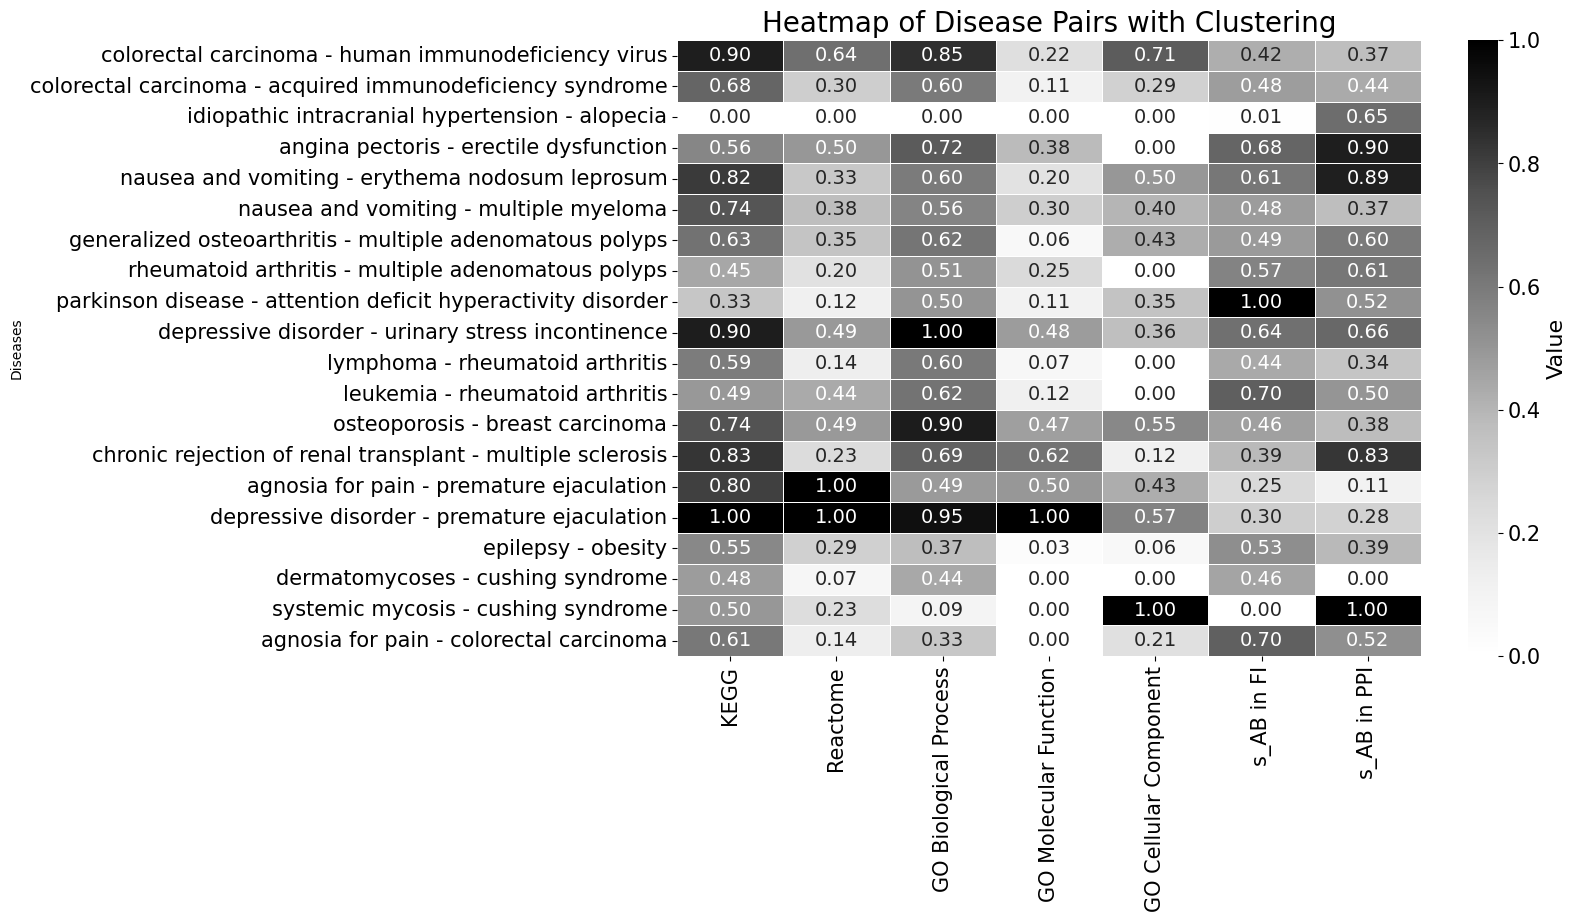

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definisci le dimensioni della figura
plt.figure(figsize=(12, 8))

# Crea la heatmap con i valori delle colonne normalizzate
heatmap = sns.heatmap(
    merged_df[['KEGG', 'Reactome', 'GO Biological Process', 'GO Molecular Function', 'GO Cellular Component', 's_AB in FI', 's_AB in PPI']],
    cmap='Greys',
    annot=True,
    fmt=".2f",
    linewidths=.5,
    annot_kws={"size": 14}
)

# Aggiungi un titolo
plt.title('Heatmap of Disease Pairs with Clustering', fontsize=20)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)

# Aumenta la dimensione del font della colorbar
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=15)  # Aumenta la dimensione del font della colorbar
colorbar.set_label('Value', fontsize=16)  # Aggiungi una label alla colorbar con dimensione del font

# Mostra la heatmap
plt.show()
